# Day 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.utils import Bunch

iris = Bunch()
print(type(iris))
iris['frame'] = pd.read_csv('iris.csv')
print(iris.keys())
iris.frame.sample(5)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['frame'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
53,5.5,2.3,4.0,1.3,versicolor
138,6.0,3.0,4.8,1.8,virginica
49,5.0,3.3,1.4,0.2,setosa
93,5.0,2.3,3.3,1.0,versicolor
117,7.7,3.8,6.7,2.2,virginica


기계학습용으로 데이터 준비하기

지도학습은 데이터와 목표값(label)이 필요합니다.

In [3]:
iris.target = iris.frame['label']
# 정수 인코딩
iris.target = iris.target.map({'setosa':0, 'versicolor':1, 'virginica':2})
iris.target.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
iris.data = iris.frame.drop(columns='label')
iris.feature_names = iris.data.columns.tolist()
print(iris.feature_names)
iris.data.sample(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
122,7.7,2.8,6.7,2.0
40,5.0,3.5,1.3,0.3
141,6.9,3.1,5.1,2.3
58,6.6,2.9,4.6,1.3


데이터를 가공하고 나면, 매번 코드를 실행하기 보다는 결과를 파일의 형태로 저장하는 것이 좋습니다.

In [5]:
import joblib

joblib.dump(iris, 'iris.joblib')

['iris.joblib']

In [6]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())
iris.frame.sample(5)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
72,6.3,2.5,4.9,1.5,1
5,5.4,3.9,1.7,0.4,0
83,6.0,2.7,5.1,1.6,1
142,5.8,2.7,5.1,1.9,2
30,4.8,3.1,1.6,0.2,0


In [7]:
표본수 = len(iris.frame)
시험데이터비율 = 0.25 # 25% (1/4)
시험데이터수 = round(표본수 * 시험데이터비율)
print(f'{시험데이터수}/{표본수}')

난수생성기 = np.random.default_rng(1)
무작위순서 = 난수생성기.permutation(표본수)

# 데이터를 훈련용과 시험용으로 나누기
train_data = iris.data.iloc[무작위순서][:-시험데이터수]
test_data = iris.data.iloc[무작위순서][-시험데이터수:]

train_target = iris.target[무작위순서][:-시험데이터수]
test_target = iris.target[무작위순서][-시험데이터수:]

print(train_data.shape, test_data.shape)

# 데이터 분포 확인
pd.DataFrame({
    'all': iris.target.value_counts(),
    'train': train_target.value_counts(),
    'test': test_target.value_counts(),
})

38/150
(112, 4) (38, 4)


,all,train,test
target,,,
0,50,38,12
1,50,36,14
2,50,38,12


In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data, iris.target, test_size=0.25, shuffle=True, random_state=0, stratify=iris.target)

print(train_data.shape, test_data.shape)

# 데이터 분포 확인
pd.DataFrame({
    'all': iris.target.value_counts(),
    'train': train_target.value_counts(),
    'test': test_target.value_counts(),
})

(112, 4) (38, 4)


,all,train,test
target,,,
0,50,37,13
1,50,37,13
2,50,38,12


In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data, train_target)

예측 = model.predict(test_data)
채점 = 예측 == test_target
print(f'{sum(채점)}/{len(채점)}={np.mean(채점):.0%}')

37/38=97%


## 캘리포니아 주택 가격

In [10]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.target[:5])
housing.frame.sample(5).round(2)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
989,3.62,4.0,4.96,1.22,2649.0,2.13,37.69,-121.89,1.39
3387,4.26,31.0,5.69,1.05,3540.0,3.13,34.24,-118.33,2.93
15667,5.04,52.0,8.56,1.77,500.0,1.49,37.80,-122.44,5.00
2837,3.77,42.0,5.83,1.06,1203.0,2.47,35.39,-119.00,0.79
4670,1.85,18.0,2.34,1.08,5229.0,3.41,34.05,-118.29,2.50


In [11]:
iris.data[['sepal length (cm)', 'petal length (cm)']][:3]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


In [12]:
iris.data.iloc[:3, [0, 2]]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


In [13]:
iris.data.to_numpy()[:3, [0, 2]]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

## kNN

y_pred=[0 1]


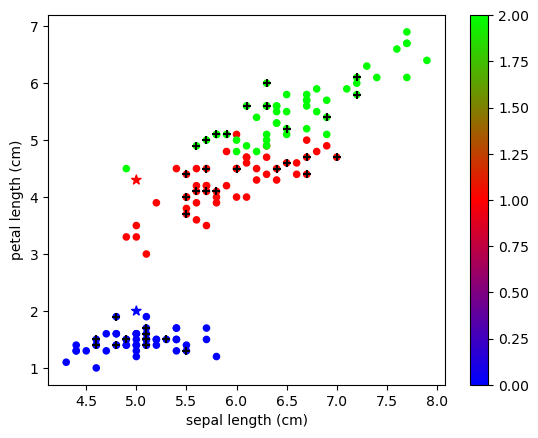

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data.iloc[:, [0, 2]].to_numpy(), iris.target, test_size=0.25, random_state=0, stratify=iris.target)

이웃수 = 3
model = KNeighborsClassifier(n_neighbors=이웃수)
model.fit(train_data, train_target)

iris.frame.plot(kind='scatter', x=0, y=2, c=iris.target, cmap='brg')
# 테스트 데이터 표시
plt.scatter(test_data[:,0], test_data[:,1], marker='+', c='black')

new_data = np.array([(5.0, 2.0), (5.0, 4.3)])
예측 = model.predict(new_data)
print(f'y_pred={예측}')
유형별색상매핑 = np.array(['blue', 'red', 'green']) # 0, 1, 2 -> 'blue', 'red', 'green'
plt.scatter(new_data[:,0], new_data[:,1], marker='*', s=50, c=유형별색상매핑[예측])
plt.show()

In [15]:
거리산출 = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

xq = new_data[0] # 궁금점 (query point)

거리 = []
for xi in train_data: # 훈련 데이터의 데이터 포인트
    # print(f'xq={xq}, xi={xi} -> 거리={거리산출(xq, xi):.2f}')
    거리.append(거리산출(xq, xi))

거리 = pd.Series(거리)
최근접이웃 = 거리.idxmin() # 최소값의 색인(=위치)
print(f'최근접이웃: {최근접이웃}, xi={train_data[최근접이웃]}')
print(f'xq={xq}', end=' -> ')
print(f'예측: {train_target[최근접이웃]}')
거리.sort_values().head().round(2)

최근접이웃: 41, xi=[5.1 1.9]
xq=[5. 2.] -> 예측: 0


41    0.14
14    0.40
9     0.40
79    0.40
54    0.45
dtype: float64

## 종양 데이터

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)
print(cancer.data.shape)
print(cancer.target_names)
print(cancer.target.value_counts())

cancer.frame.sample(5).round(2)

(569, 30)
['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
35,16.74,21.59,110.10,869.5,0.10,0.13,0.13,0.06,0.19,0.06,...,29.02,133.50,1229.0,0.16,0.38,0.54,0.18,0.49,0.09,0
24,16.65,21.38,110.00,904.6,0.11,0.15,0.15,0.09,0.20,0.06,...,31.56,177.00,2215.0,0.18,0.36,0.47,0.21,0.36,0.10,0
308,13.50,12.71,85.69,566.2,0.07,0.04,0.00,0.00,0.14,0.05,...,16.94,95.48,698.7,0.09,0.06,0.01,0.02,0.23,0.06,1
329,16.26,21.88,107.50,826.8,0.12,0.13,0.18,0.08,0.19,0.07,...,25.21,113.70,975.2,0.14,0.21,0.33,0.10,0.27,0.08,0
259,15.53,33.56,103.70,744.9,0.11,0.16,0.18,0.08,0.21,0.07,...,49.54,126.30,1035.0,0.19,0.56,0.57,0.20,0.35,0.12,0


## 단위 정규화

In [21]:
열별최소값 = cancer.data.min()
열별최대값 = cancer.data.max()

cancer_data_scaled = (cancer.data - 열별최소값) / (열별최대값 - 열별최소값)
cancer_data_scaled.apply(['min', 'max']).round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
samples = np.linspace(0, 1, 12).reshape(3, 4)
print(samples.round(2))
print(samples.mean(axis=None)) # 전체 평균
print(samples.mean(axis=0).round(2))  # 열별 평균
print(samples.mean(axis=1).round(2))  # 행별 평균

[[0.   0.09 0.18 0.27]
 [0.36 0.45 0.55 0.64]
 [0.73 0.82 0.91 1.  ]]
0.5
[0.36 0.45 0.55 0.64]
[0.14 0.5  0.86]


In [32]:
print(200 * 1.1)
# assert 220 == 200 * 1.1 # 실패할 수 있습니다.
assert np.isclose(220, 200 * 1.1) # 부동소수점 오차를 고려하여 비교

220.00000000000003


In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_data, test_data, train_target, test_target = train_test_split(
    cancer.data, cancer.target, test_size=0.25, random_state=2, stratify=cancer.target)

scaler = MinMaxScaler()
scaler.fit(train_data) # 훈련 데이터로부터 열별 최소값과 최대값을 구함
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
# 정규화된 데이터의 최소값과 최대값 확인
assert np.allclose(train_data.min(axis=0), 0) and np.allclose(train_data.max(axis=0), 1)

print(train_data.shape, test_data.shape)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_data, train_target)

예측 = model.predict(test_data)
채점 = 예측 == test_target
print(f'{sum(채점)}/{len(채점)}={np.mean(채점):.0%}')

(426, 30) (143, 30)
136/143=95%


## 단위 정규화 기법들

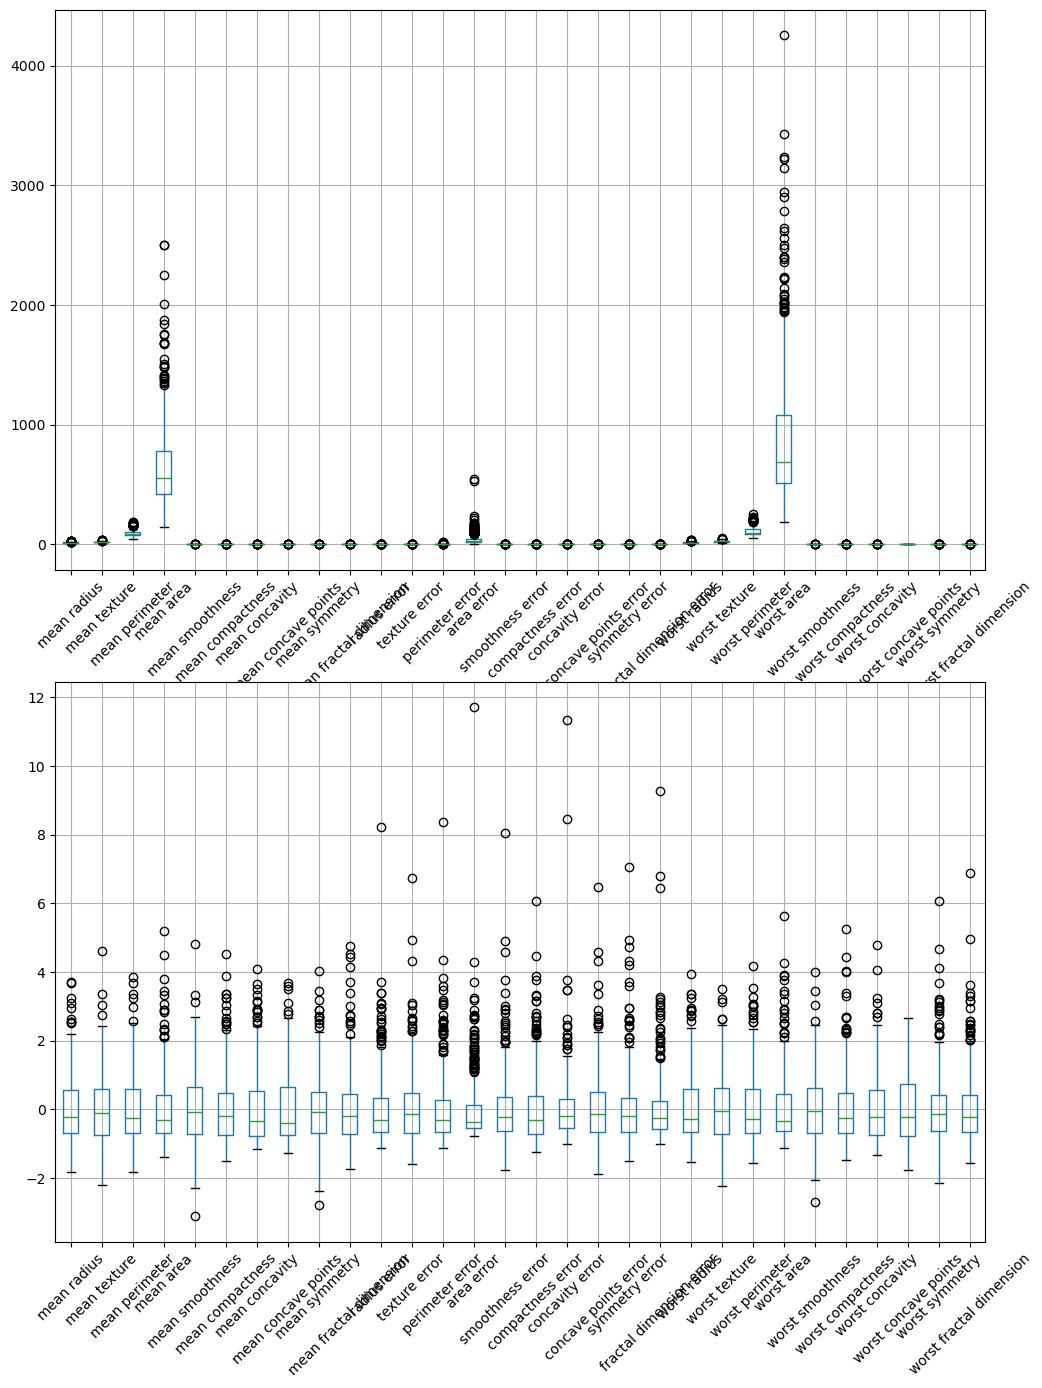

In [51]:
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_target, test_target = train_test_split(
    cancer.data, cancer.target, test_size=0.25, random_state=2, stratify=cancer.target)

scaler = StandardScaler()
# 열별평균 = train_data.mean(axis=0)
# 열별편차 = train_data.std(axis=0)
scaler.fit(train_data) # 훈련 데이터로부터 열별 평균과 편차를 구함
# train_data = (train_data - 열별평균) / 열별편차
train_data = scaler.transform(train_data)
assert np.allclose(train_data.mean(axis=0), 0) and np.allclose(train_data.std(axis=0), 1)

# 데이터 분포 시각화
plt.figure(figsize=(12, 16)) # 그림 크기: 가로, 세로
plt.subplot(2, 1, 1) # 2행 1열 중 첫 번째
cancer.data.boxplot(rot=45) # 정규화 전
plt.subplot(2, 1, 2) # 2행 2열 중 두 번째
pd.DataFrame(train_data, columns=cancer.feature_names).boxplot(rot=45) # 정규화 후
plt.show()

<Axes: >

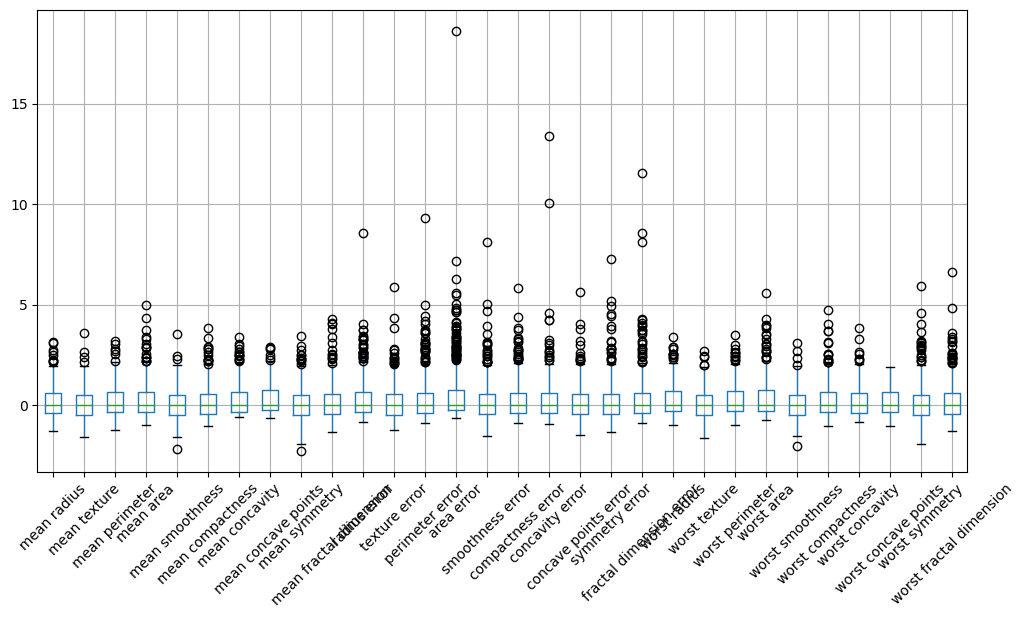

In [69]:
from sklearn.preprocessing import RobustScaler

train_data, test_data, train_target, test_target = train_test_split(
    cancer.data, cancer.target, test_size=0.25, random_state=2, stratify=cancer.target)

scaler = RobustScaler()
# Q1, Q2, Q3 = np.percentile(train_data, [25, 50, 75], axis=0)
scaler.fit(train_data) # 훈련 데이터로부터 열별 Q1, Q2, Q3를 구함
# 0으로 중앙값 조정, IQR로 구간 범위 조정
# train_data = (train_data - Q2) / (Q3 - Q1)
train_data = scaler.transform(train_data)

# 조정된 데이터 확인
Q1, Q2, Q3 = np.percentile(train_data, [25, 50, 75], axis=0)
assert np.allclose(Q2, 0) # 중앙값이 0
assert np.allclose(Q3 - Q1, 1)

# 데이터 분포 시각화
plt.figure(figsize=(12, 6)) # 그림 크기: 가로, 세로
pd.DataFrame(train_data, columns=cancer.feature_names).boxplot(rot=45)